<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r1_model_limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-3-r1.csv?token=AKVFSOEVHMKCJQ65CFLMYI26ZJG32')
print(df.shape)
df

(56917, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
1,84,4,2,1,1,4,3,9,3,3,24,8,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9,1
2,216,2,4,1,1,4,3,9,0,0,22,6,6,3,1,0.333333,8,1,1,1,1,1,8,1,4,24,3,27,9,1
3,342,2,4,1,1,4,3,9,0,0,23,7,8,4,1,0.250000,8,1,1,1,1,1,8,1,4,32,3,27,9,1
4,388,1,2,1,1,4,3,9,3,3,21,5,9,3,2,0.666667,12,1,1,1,1,1,2,1,4,36,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,3268816,4,2,6,2,2,3,9,18,2,20,4,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54,1
56913,3268823,4,2,6,3,2,3,9,18,2,20,4,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54,1
56914,3268830,4,2,6,4,2,3,9,18,2,20,4,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54,1
56915,3268837,4,2,6,5,3,3,9,18,2,20,4,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-1-r1.csv?token=AKVFSODBXB5IUCFE6ERSQMC6ZJG32', nrows=50000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-6-r1.csv?token=AKVFSOGMU5OD4YODOXGQVU26ZJG36', nrows=50000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-9-r1.csv?token=AKVFSOFB72UAJ6OIWSC6RXS6ZJXTK', nrows=50000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-14-r1.csv?token=AKVFSOG5FLJP4JXI2E2QCES6ZJG64', nrows=50000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-12-r1.csv?token=AKVFSOFBTOXQTACUR6HO4S26ZKC7W')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-15-r1.csv?token=AKVFSOBIOD6U4H3T63VAP4K6ZKC72')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-5-r1.csv?token=AKVFSOFQLXJBX5OKN64XFBC6ZKC76')

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(50000, 30)
(50000, 30)
(50000, 30)
(50000, 30)
(46088, 30)
(45531, 30)
(46627, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [7]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,1,1,1,1,1,8,1,4,4,3,27,9,1
3,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
4,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395158,3275300,4,2,6,2,2,3,9,18,2,20,4,20057,3,1,0.333333,15,1,1,1,1,1,8,12,24,481368,18,27,54,1
395159,3275307,4,2,6,3,2,3,9,18,2,20,4,20057,3,1,0.333333,22,1,1,1,1,1,8,18,36,722052,18,27,54,1
395160,3275314,4,2,6,4,2,3,9,18,2,20,4,20057,3,1,0.333333,29,1,1,1,1,1,8,24,48,962736,18,27,54,1
395161,3275321,4,2,6,5,3,3,9,18,2,20,4,20057,3,1,0.333333,36,1,1,1,1,1,8,30,90,1805130,18,27,54,1


In [8]:
df.shape

(395163, 30)

Test Data

In [9]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-13-r1.csv?token=AKVFSOBJ6YDCG2K3JNTO6O26ZJJBG', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-2-r1.csv?token=AKVFSOCVXJ5DH3YNIWVYOHS6ZJ52G', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-5-r1.csv?token=AKVFSOFBHZKQTCCGUNRVDUC6ZJ52K', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-10-r1.csv?token=AKVFSOEN6ZF5ZVFFYY6NGRC6ZJ52S', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-12-r1.csv?token=AKVFSOBETR5ER5HO2377XD26ZJ52W', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-15-r1.csv?token=AKVFSOHJX2J2JISMXV7YH626ZJ526', nrows=30000)
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-10-r1.csv?token=AKVFSOGUBLR43HE4EX4QCE26ZKDGA', nrows=30000)
df5.shape

(30000, 30)

In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
1,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,0
2,238,2,4,1,1,4,3,9,0,0,22,6,9,3,1,0.333333,8,1,1,1,1,1,8,1,4,36,3,27,9,0
3,365,2,4,1,1,4,3,9,0,0,23,7,12,4,1,0.250000,8,1,1,1,1,1,8,1,4,48,3,27,9,0
4,386,1,2,1,1,4,3,9,3,3,21,5,13,3,2,0.666667,12,1,1,1,1,1,2,1,4,52,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1549721,4,2,6,4,2,3,11,18,2,20,4,10897,3,1,0.333333,36,1,1,1,1,1,8,24,48,523056,18,33,54,0
29996,1549728,4,2,6,5,3,3,11,18,2,20,4,10897,3,1,0.333333,43,1,1,1,1,1,8,30,90,980730,18,33,54,0
29997,1549729,4,2,2,1,4,3,9,18,2,20,4,10898,3,1,0.333333,43,1,1,1,1,1,8,2,8,87184,6,27,18,0
29998,1549730,1,2,7,1,4,3,10,18,2,13,13,10895,4,1,0.250000,33,1,1,1,1,1,2,7,28,305060,21,30,63,0


In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.362600,0.269440,0.014987,-0.022313,-0.250171,-0.068045,0.001661,0.186168,-0.289051,-0.602655,-0.005158,-0.058134,0.112226,0.034560,0.043520,0.028728,0.414664,0.136782,0.112717,0.080688,0.201565,-0.176646,0.082037,0.015659
inport,-0.362600,1.000000,-0.185107,0.051616,-0.076816,-0.146459,-0.378661,0.093040,0.290878,0.075419,0.158791,0.113271,-0.077056,-0.213376,-0.185568,-0.171805,-0.148930,0.574666,-0.030460,-0.046139,0.012255,-0.219904,-0.260670,-0.244046,0.186912
cache_coherence_type,0.269440,-0.185107,1.000000,0.373612,-0.556014,-0.073033,-0.135793,0.019005,-0.048943,-0.107713,-0.157986,-0.429993,0.053723,-0.029875,0.015238,0.028443,0.024046,0.016419,0.551397,0.439910,0.326926,0.966911,-0.105373,0.808844,0.010080
flit_id,0.014987,0.051616,0.373612,1.000000,-0.059788,0.049625,-0.085521,0.015422,0.043222,0.009281,-0.015977,0.519107,0.036619,0.024681,0.039167,0.055215,0.033833,0.039218,0.971032,0.933470,0.698698,0.380923,-0.010917,0.347540,-0.003105
flit_type,-0.022313,-0.076816,-0.556014,-0.059788,1.000000,-0.073845,0.127285,-0.023000,-0.064344,-0.013830,0.023774,0.524452,-0.121722,0.174515,0.033729,-0.002287,-0.003478,-0.058379,-0.156091,0.101854,0.071195,-0.566893,0.016255,-0.517210,0.004652
vnet,-0.250171,-0.146459,-0.073033,0.049625,-0.073845,1.000000,0.832987,-0.123999,-0.044917,0.281643,0.296920,-0.078524,0.081704,0.081330,0.104169,0.076343,0.057043,-0.205954,-0.017130,-0.020721,-0.073708,0.183815,0.966466,0.527381,-0.160269
vc,-0.068045,-0.378661,-0.135793,-0.085521,0.127285,0.832987,1.000000,-0.124795,-0.173796,0.037400,0.058540,-0.068011,0.066701,0.186127,0.161541,0.130875,0.107827,-0.353415,-0.128827,-0.086324,-0.126110,0.079238,0.947136,0.375445,-0.161337
traversal_id,0.001661,0.093040,0.019005,0.015422,-0.023000,-0.123999,-0.124795,1.000000,0.064075,-0.023255,-0.040845,0.039365,-0.071782,-0.071784,-0.091730,-0.085912,-0.081374,0.059452,0.018332,0.012215,0.520028,-0.012987,-0.129822,-0.056919,0.048161
hop_count,0.186168,0.290878,-0.048943,0.043222,-0.064344,-0.044917,-0.173796,0.064075,1.000000,0.393614,-0.196170,0.180704,-0.109491,-0.083856,-0.123538,-0.117239,-0.111003,0.591792,0.021524,0.002372,0.032957,-0.059728,-0.106707,-0.068178,0.062602
current_hop,-0.289051,0.075419,-0.107713,0.009281,-0.013830,0.281643,0.037400,-0.023255,0.393614,1.000000,0.711857,0.249854,0.019950,-0.084311,-0.041122,-0.049749,-0.044733,0.128482,-0.039546,-0.037608,-0.039604,-0.034118,0.180672,0.074295,-0.042682


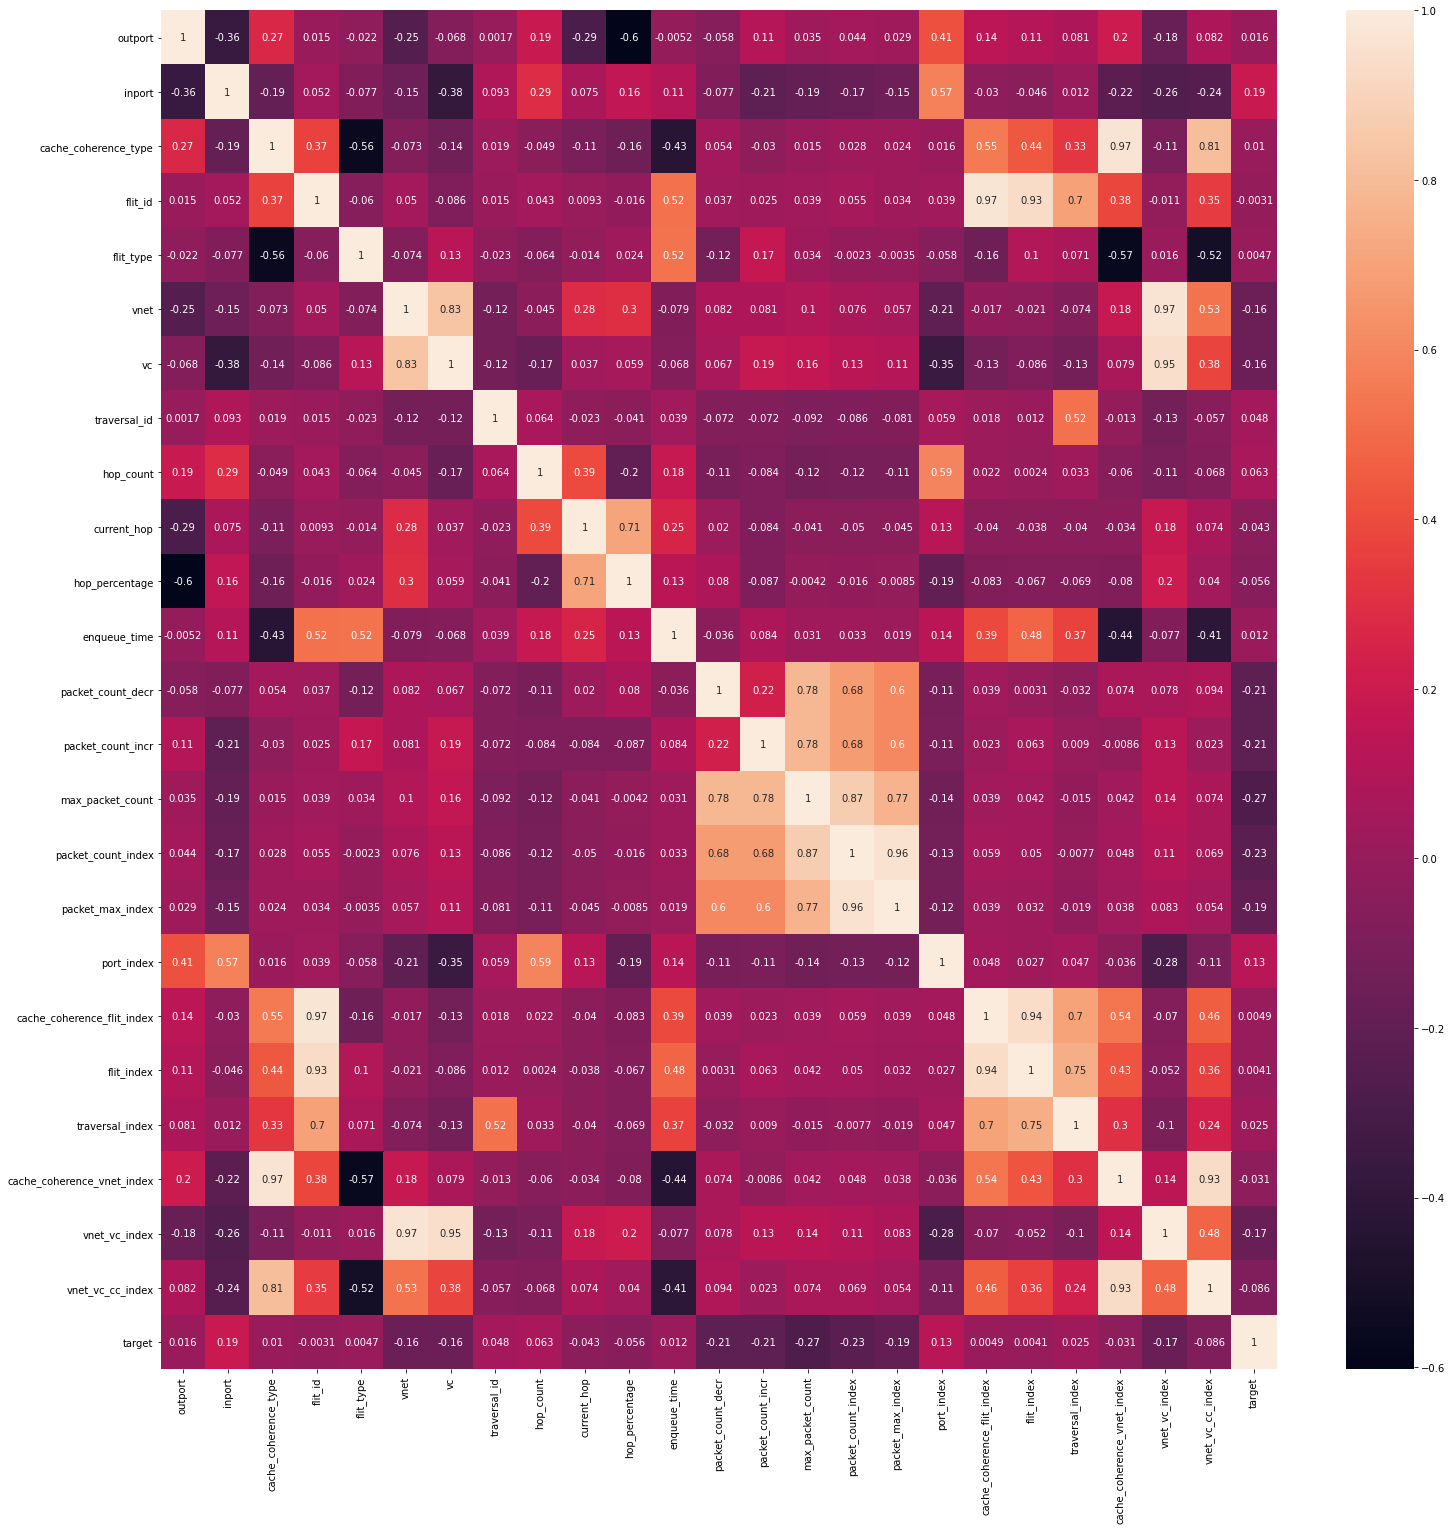

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [15]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,1,1,1,1,1,8,1,4,4,3,27,9
3,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
4,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395158,4,2,6,2,2,3,9,20057,3,1,0.333333,15,1,1,1,1,1,8,12,24,481368,18,27,54
395159,4,2,6,3,2,3,9,20057,3,1,0.333333,22,1,1,1,1,1,8,18,36,722052,18,27,54
395160,4,2,6,4,2,3,9,20057,3,1,0.333333,29,1,1,1,1,1,8,24,48,962736,18,27,54
395161,4,2,6,5,3,3,9,20057,3,1,0.333333,36,1,1,1,1,1,8,30,90,1805130,18,27,54


In [16]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000049,0.500000,0.0,0.000000,0.000000,0.233333,0.0,0.233333,0.027451,0.007940,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.033333,0.0,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.033333,0.0,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.033333,0.0,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395158,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000,0.978055,0.500000,0.2,0.333333,0.171875,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.261119,0.833333,0.000000,0.494505
395159,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000,0.978055,0.500000,0.2,0.333333,0.281250,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.391680,0.833333,0.000000,0.494505
395160,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000,0.978055,0.500000,0.2,0.333333,0.390625,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.522240,0.833333,0.000000,0.494505
395161,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000,0.978055,0.500000,0.2,0.333333,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.979202,0.833333,0.000000,0.494505


In [17]:
train_X[train_X.duplicated()].shape

(17510, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [19]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000275,0.8,0.666667,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000734,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.001009,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000045,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.001101,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.833333,0.75,0.333333,0.0,0.666667,0.999908,0.4,0.333333,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.793103,0.511628,0.533331,0.833333,0.666667,0.833333
29996,1.00,0.5,0.833333,1.00,0.666667,0.0,0.666667,0.999908,0.4,0.333333,0.333333,0.609375,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.000000,0.833333,0.666667,0.833333
29997,1.00,0.5,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.4,0.333333,0.333333,0.609375,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.034483,0.046512,0.088893,0.166667,0.000000,0.166667
29998,0.25,0.5,1.000000,0.00,1.000000,0.0,0.333333,0.999725,0.6,0.333333,0.250000,0.453125,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.206897,0.279070,0.311051,1.000000,0.333333,1.000000


In [20]:
test_X[test_X.duplicated()].shape

(0, 24)

In [21]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.063492,0.033333,0.000000,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000296,0.8,1.0,0.400000,0.126984,0.000000,0.033333,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000
2,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000395,0.6,0.5,0.250000,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000789,0.4,0.5,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000035,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.001085,0.6,0.5,0.250000,0.063492,0.033333,0.000000,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999803,0.6,1.0,0.500000,0.460317,0.100000,0.100000,0.200000,0.058824,0.013989,1.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.833333
29996,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999803,0.6,1.0,0.500000,0.571429,0.066667,0.133333,0.200000,0.054902,0.013106,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29997,1.0,0.5,0.166667,0.00,1.000000,0.0,0.333333,0.999901,0.6,1.0,0.500000,0.571429,0.033333,0.166667,0.200000,0.043137,0.010460,1.0,0.034483,0.046512,0.088894,0.166667,0.333333,0.166667
29998,1.0,0.5,1.000000,0.00,1.000000,0.0,0.666667,0.999803,0.4,1.0,0.666667,0.142857,0.000000,0.200000,0.200000,0.023529,0.006049,1.0,0.206897,0.279070,0.311108,1.000000,0.666667,1.000000


In [22]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.5,0.250000,0.062500,0.04,0.00,0.04,0.005525,0.000634,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000273,0.8,1.0,0.400000,0.125000,0.00,0.04,0.04,0.005525,0.000634,1.00,0.000000,0.000000,0.000012,0.000000,0.0,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000729,0.4,0.5,0.333333,0.062500,0.00,0.00,0.00,0.000000,0.000000,1.00,0.000000,0.000000,0.000032,0.000000,0.0,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.001003,0.6,0.5,0.250000,0.062500,0.00,0.00,0.00,0.000000,0.000000,1.00,0.000000,0.000000,0.000045,0.000000,0.0,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.0,0.001094,0.4,1.0,0.666667,0.125000,0.00,0.00,0.00,0.000000,0.000000,0.25,0.000000,0.000000,0.000049,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.8,1.0,0.400000,0.125000,0.00,0.24,0.24,0.033149,0.010146,1.00,0.137931,0.011628,0.055572,0.666667,0.0,0.666667
29996,1.00,0.5,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.8,1.0,0.400000,0.234375,0.16,0.00,0.16,0.022099,0.005073,1.00,0.310345,0.186047,0.222300,0.666667,0.0,0.666667
29997,1.00,0.5,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.8,1.0,0.400000,0.343750,0.12,0.04,0.16,0.038674,0.008244,1.00,0.482759,0.302326,0.333452,0.666667,0.0,0.666667
29998,1.00,0.5,0.666667,0.75,0.333333,0.0,0.0,1.000000,0.8,1.0,0.400000,0.453125,0.08,0.08,0.16,0.044199,0.009300,1.00,0.655172,0.418605,0.444604,0.666667,0.0,0.666667


In [23]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.333333,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.00,0.50,0.000000,0.00,1.000000,0.0,0.0,0.000269,0.8,0.666667,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000012,0.000000,0.0,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000718,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000032,0.000000,0.0,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000987,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000044,0.000000,0.0,0.000000
4,0.25,0.50,0.000000,0.00,1.000000,0.0,0.0,0.001077,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000048,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,0.00,1.000000,0.00,1.000000,0.0,0.0,0.999551,0.4,0.000000,0.000000,0.031250,0.000000,0.321429,0.321429,0.040179,0.015175,0.00,0.206897,0.279070,0.311108,1.000000,0.0,1.000000
29996,0.00,0.25,0.333333,0.00,1.000000,0.0,0.0,0.999641,0.2,0.666667,1.000000,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.068966,0.093023,0.133342,0.333333,0.0,0.333333
29997,0.00,0.25,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.4,1.000000,1.000000,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.137931,0.011628,0.055577,0.666667,0.0,0.666667
29998,0.00,0.25,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.4,1.000000,1.000000,0.296875,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.310345,0.186047,0.222319,0.666667,0.0,0.666667


In [24]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.037037,0.000000,0.037037,0.004785,0.00051,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000275,0.8,0.4,0.400000,0.125000,0.000000,0.037037,0.037037,0.004785,0.00051,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000641,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000029,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000916,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.001099,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999908,0.2,0.4,1.000000,0.234375,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.310345,0.186047,0.222341,0.666667,0.000000,0.666667
29996,0.00,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999908,0.2,0.4,1.000000,0.343750,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.482759,0.302326,0.333514,0.666667,0.000000,0.666667
29997,0.00,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999908,0.2,0.4,1.000000,0.453125,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.655172,0.418605,0.444686,0.666667,0.000000,0.666667
29998,0.00,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999908,0.2,0.4,1.000000,0.562500,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.827586,0.825581,0.833791,0.666667,0.000000,0.666667


In [25]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000272,0.8,0.4,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000724,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000032,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000996,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.001086,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.999819,1.0,0.2,0.166667,0.281250,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.482759,0.302326,0.333451,0.666667,0.000000,0.666667
29996,0.50,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.999819,1.0,0.2,0.166667,0.390625,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.655172,0.418605,0.444603,0.666667,0.000000,0.666667
29997,0.50,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.999819,1.0,0.2,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.827586,0.825581,0.833635,0.666667,0.000000,0.666667
29998,0.50,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.999909,1.0,0.2,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.044461,0.000000,0.333333,0.000000


In [26]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(16, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000418,0.4,0.333333,0.333333,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000585,0.6,0.333333,0.250000,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000026,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000753,0.2,0.333333,0.500000,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000
4,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000836,0.4,1.000000,1.000000,0.187500,0.043478,0.0,0.043478,0.006452,0.000801,0.0,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.00,0.833333,0.25,0.333333,0.0,0.666667,0.999916,0.2,0.000000,0.000000,0.109375,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266664,0.833333,0.666667,0.833333
29996,1.00,0.00,0.833333,0.50,0.333333,0.0,0.666667,0.999916,0.2,0.000000,0.000000,0.218750,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.586207,0.372093,0.399998,0.833333,0.666667,0.833333
29997,1.00,0.00,0.833333,0.75,0.333333,0.0,0.666667,0.999916,0.2,0.000000,0.000000,0.328125,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533332,0.833333,0.666667,0.833333
29998,1.00,0.00,0.833333,1.00,0.666667,0.0,0.666667,0.999916,0.2,0.000000,0.000000,0.437500,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.666667,0.833333


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [28]:
train_Y = df['target']
train_Y.value_counts()

0    200000
1    195163
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  7922.403486
14            max_packet_count  5547.706911
22               vnet_vc_index  4743.668565
6                           vc  3322.955972
12           packet_count_decr  2774.644690
13           packet_count_incr  2773.062446
15          packet_count_index  2632.324362
1                       inport  2571.887054
17                  port_index  1870.634088
16            packet_max_index  1827.856195
10              hop_percentage   228.175513
23            vnet_vc_cc_index   216.556517
7                 traversal_id   116.713894
8                    hop_count   105.970046
9                  current_hop    71.118149
20             traversal_index    40.333069
21  cache_coherence_vnet_index    37.259442


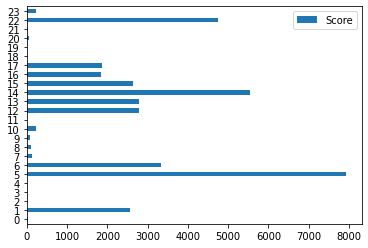

In [31]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [34]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 64.72969980704141
Test Prediction  65.05510356433388


In [36]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.79666666666667


In [37]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  50.59


In [38]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  47.81


In [39]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  66.52


In [40]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.90666666666667


In [41]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.46000000000001


In [42]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  45.95666666666667


In [43]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
18,cache_coherence_flit_index,3.388034
1,inport,2.295449
9,current_hop,2.005709
2,cache_coherence_type,1.821502
15,packet_count_index,1.798453
6,vc,1.361115
0,outport,0.961229
4,flit_type,0.618402
7,traversal_id,0.027462
20,traversal_index,-0.041973


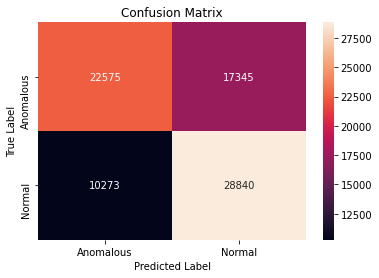

In [44]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62     39920
           1       0.62      0.74      0.68     39113

    accuracy                           0.65     79033
   macro avg       0.66      0.65      0.65     79033
weighted avg       0.66      0.65      0.65     79033



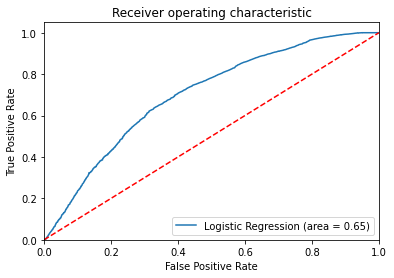

In [46]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

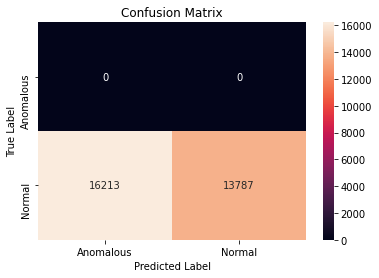

In [47]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.46      0.63     30000

    accuracy                           0.46     30000
   macro avg       0.50      0.23      0.31     30000
weighted avg       1.00      0.46      0.63     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [49]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [51]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.25533799386328
Test Prediction  79.3124391077145


In [52]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  64.99666666666667


In [53]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  62.88333333333333


In [54]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  59.166666666666664


In [55]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  63.413333333333334


In [56]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.653333333333336


In [57]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  57.17666666666666


In [58]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  43.663333333333334


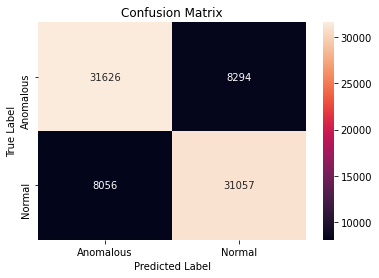

In [59]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     39920
           1       0.79      0.79      0.79     39113

    accuracy                           0.79     79033
   macro avg       0.79      0.79      0.79     79033
weighted avg       0.79      0.79      0.79     79033



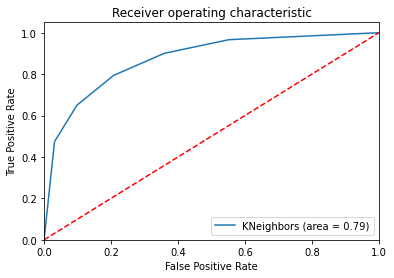

In [61]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

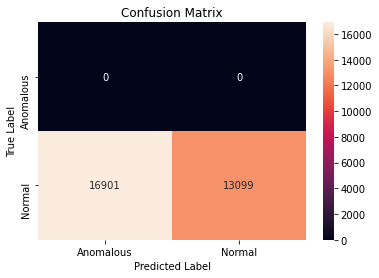

In [62]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.44      0.61     30000

    accuracy                           0.44     30000
   macro avg       0.50      0.22      0.30     30000
weighted avg       1.00      0.44      0.61     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [65]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [67]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 56.01935912441084
Test Prediction Score 56.08163678463427


In [68]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 37.20666666666666


In [69]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  32.89333333333334


In [70]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  35.54666666666667


In [71]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.339999999999996


In [72]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.163333333333334


In [73]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.153333333333336


In [74]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  68.49666666666666


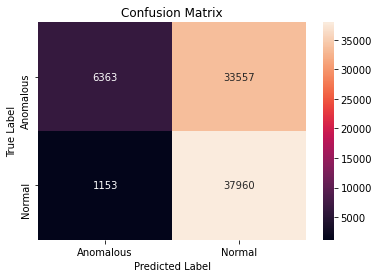

In [75]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [76]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.16      0.27     39920
           1       0.53      0.97      0.69     39113

    accuracy                           0.56     79033
   macro avg       0.69      0.56      0.48     79033
weighted avg       0.69      0.56      0.48     79033



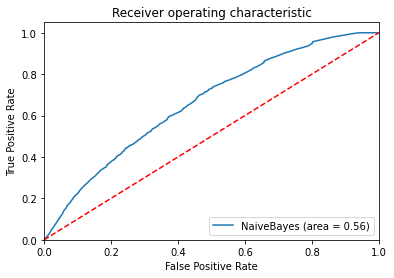

In [77]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [78]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [79]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 252904 samples, validate on 63226 samples
Epoch 1/10
252904/252904 [==============================] - 10s 39us/step - loss: 0.2238 - accuracy: 0.6295 - val_loss: 0.2214 - val_accuracy: 0.6397
Epoch 2/10
252904/252904 [==============================] - 10s 38us/step - loss: 0.2203 - accuracy: 0.6439 - val_loss: 0.2185 - val_accuracy: 0.6444
Epoch 3/10
252904/252904 [==============================] - 9s 37us/step - loss: 0.2166 - accuracy: 0.6557 - val_loss: 0.2150 - val_accuracy: 0.6624
Epoch 4/10
252904/252904 [==============================] - 9s 37us/step - loss: 0.2142 - accuracy: 0.6631 - val_loss: 0.2136 - val_accuracy: 0.6614
Epoch 5/10
252904/252904 [==============================] - 9s 36us/step - loss: 0.2129 - accuracy: 0.6643 - val_loss: 0.2126 - val_accuracy: 0.6620
Epoch 6/10
252904/252904 [==============================] - 9s 36us/step - loss: 0.2122 - accuracy: 0.6643 - val_loss: 0.2123 - val_accuracy: 0.6671
Epoch 7/10
252904/252904 [===========================

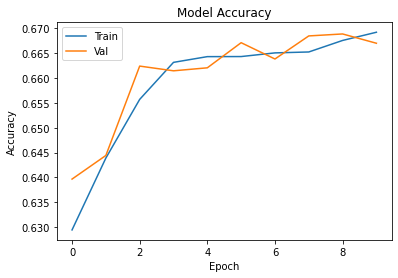

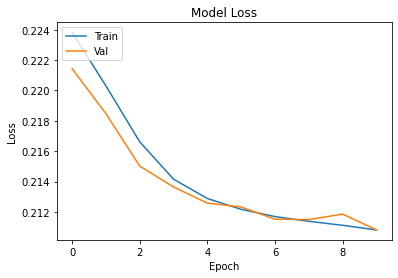

In [80]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [81]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.98%


In [82]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.25%


In [83]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 36.81%


In [84]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 33.27%


In [85]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 47.64%


In [86]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.27%


In [87]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.46%


In [88]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.84%


3-Layer Neural Network

In [89]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 252904 samples, validate on 63226 samples
Epoch 1/30
252904/252904 [==============================] - 9s 36us/step - loss: 0.2343 - accuracy: 0.5994 - val_loss: 0.2238 - val_accuracy: 0.6345
Epoch 2/30
252904/252904 [==============================] - 9s 35us/step - loss: 0.2216 - accuracy: 0.6392 - val_loss: 0.2203 - val_accuracy: 0.6391
Epoch 3/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2192 - accuracy: 0.6469 - val_loss: 0.2184 - val_accuracy: 0.6546
Epoch 4/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2175 - accuracy: 0.6531 - val_loss: 0.2169 - val_accuracy: 0.6578
Epoch 5/30
252904/252904 [==============================] - 10s 41us/step - loss: 0.2163 - accuracy: 0.6550 - val_loss: 0.2160 - val_accuracy: 0.6516
Epoch 6/30
252904/252904 [==============================] - 9s 36us/step - loss: 0.2154 - accuracy: 0.6561 - val_loss: 0.2154 - val_accuracy: 0.6613
Epoch 7/30
252904/252904 [============================

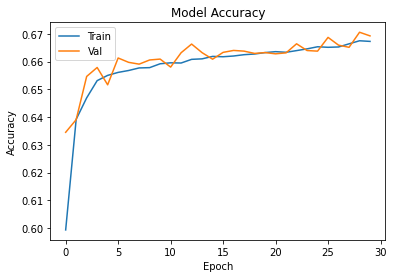

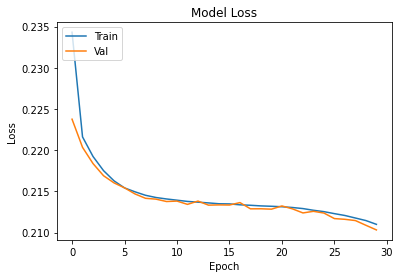

In [90]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [91]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.90%


In [92]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 45.71%
accuracy: 57.26%
accuracy: 53.76%
accuracy: 43.72%
accuracy: 40.32%
accuracy: 39.53%
accuracy: 79.03%


4-Layer Neural Network



In [93]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 252904 samples, validate on 63226 samples
Epoch 1/30
252904/252904 [==============================] - 10s 38us/step - loss: 0.2473 - accuracy: 0.5274 - val_loss: 0.2402 - val_accuracy: 0.5843
Epoch 2/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2283 - accuracy: 0.6179 - val_loss: 0.2214 - val_accuracy: 0.6311
Epoch 3/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2199 - accuracy: 0.6414 - val_loss: 0.2186 - val_accuracy: 0.6481
Epoch 4/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2171 - accuracy: 0.6514 - val_loss: 0.2154 - val_accuracy: 0.6547
Epoch 5/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2136 - accuracy: 0.6619 - val_loss: 0.2114 - val_accuracy: 0.6682
Epoch 6/30
252904/252904 [==============================] - 9s 37us/step - loss: 0.2097 - accuracy: 0.6709 - val_loss: 0.2077 - val_accuracy: 0.6764
Epoch 7/30
252904/252904 [============================

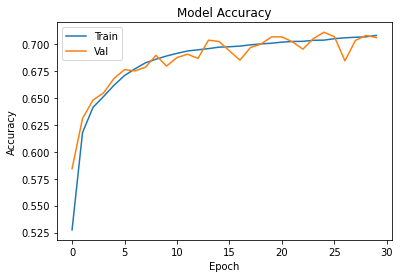

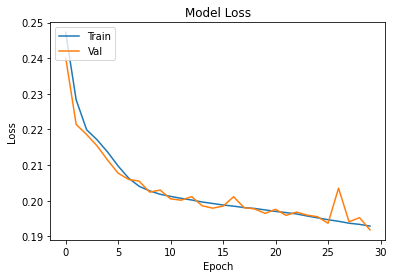

In [94]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [95]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.00%


In [96]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.48%
accuracy: 41.59%
accuracy: 40.11%
accuracy: 46.55%
accuracy: 54.60%
accuracy: 54.00%
accuracy: 60.16%


5-Layer Neural Network Optimized

In [97]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 252904 samples, validate on 63226 samples
Epoch 1/100
252904/252904 [==============================] - 18s 72us/step - loss: 0.2040 - accuracy: 0.6802 - val_loss: 0.1902 - val_accuracy: 0.7188
Epoch 2/100
252904/252904 [==============================] - 17s 65us/step - loss: 0.1916 - accuracy: 0.7048 - val_loss: 0.1822 - val_accuracy: 0.7225
Epoch 3/100
252904/252904 [==============================] - 17s 66us/step - loss: 0.1843 - accuracy: 0.7180 - val_loss: 0.1781 - val_accuracy: 0.7335
Epoch 4/100
252904/252904 [==============================] - 18s 72us/step - loss: 0.1807 - accuracy: 0.7253 - val_loss: 0.1698 - val_accuracy: 0.7459
Epoch 5/100
252904/252904 [==============================] - 18s 73us/step - loss: 0.1771 - accuracy: 0.7322 - val_loss: 0.1657 - val_accuracy: 0.7515
Epoch 6/100
252904/252904 [==============================] - 17s 68us/step - loss: 0.1742 - accuracy: 0.7369 - val_loss: 0.1650 - val_accuracy: 0.7523
Epoch 7/100
252904/252904 [================

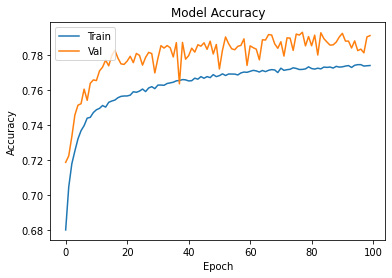

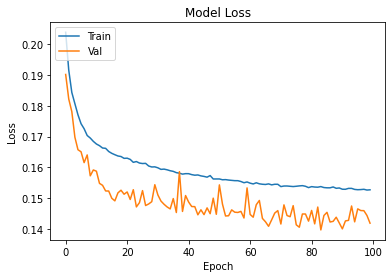

In [98]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [99]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.35%


In [100]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.36%
accuracy: 65.02%
accuracy: 65.35%
accuracy: 74.10%
accuracy: 57.61%
accuracy: 57.56%
accuracy: 41.95%


In [101]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 252904 samples, validate on 63226 samples
Epoch 1/50
252904/252904 [==============================] - 19s 75us/step - loss: 0.2038 - accuracy: 0.6808 - val_loss: 0.1868 - val_accuracy: 0.7084
Epoch 2/50
252904/252904 [==============================] - 21s 84us/step - loss: 0.1897 - accuracy: 0.7079 - val_loss: 0.1760 - val_accuracy: 0.7361
Epoch 3/50
252904/252904 [==============================] - 18s 71us/step - loss: 0.1840 - accuracy: 0.7179 - val_loss: 0.1756 - val_accuracy: 0.7332
Epoch 4/50
252904/252904 [==============================] - 18s 71us/step - loss: 0.1798 - accuracy: 0.7272 - val_loss: 0.1725 - val_accuracy: 0.7344
Epoch 5/50
252904/252904 [==============================] - 18s 71us/step - loss: 0.1760 - accuracy: 0.7347 - val_loss: 0.1644 - val_accuracy: 0.7595
Epoch 6/50
252904/252904 [==============================] - 18s 71us/step - loss: 0.1721 - accuracy: 0.7408 - val_loss: 0.1598 - val_accuracy: 0.7654
Epoch 7/50
252904/252904 [=======================

In [102]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.31%


In [103]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.07%
accuracy: 60.39%
accuracy: 58.76%
accuracy: 68.05%
accuracy: 63.03%
accuracy: 63.25%
accuracy: 41.79%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [107]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.49226584000253
Test Prediction Score 91.12269558285779


In [108]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 70.77333333333333
Test Prediction Score 52.31666666666667
Test Prediction Score 53.836666666666666
Test Prediction Score 69.17666666666666
Test Prediction Score 59.656666666666666
Test Prediction Score 59.873333333333335
Test Prediction Score 39.93


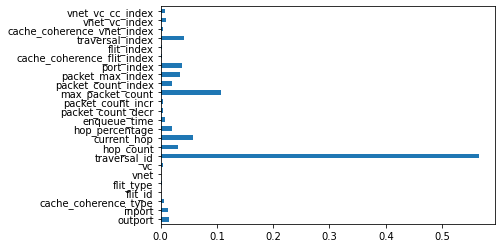

In [109]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

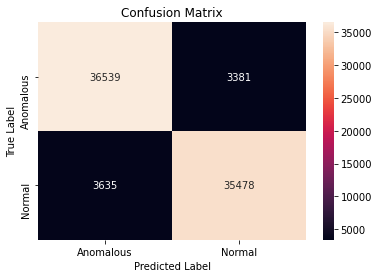

In [110]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [111]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     39920
           1       0.91      0.91      0.91     39113

    accuracy                           0.91     79033
   macro avg       0.91      0.91      0.91     79033
weighted avg       0.91      0.91      0.91     79033



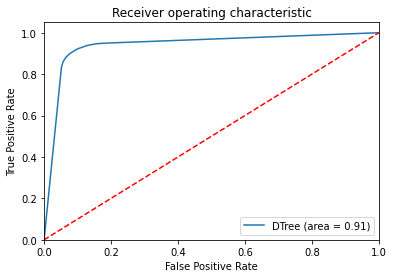

In [112]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [116]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.7017998924493
Test Prediction Score 92.13999215517569


In [117]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 70.09333333333333
Test Prediction Score 48.86333333333333
Test Prediction Score 50.470000000000006
Test Prediction Score 69.07666666666667
Test Prediction Score 57.596666666666664
Test Prediction Score 56.91333333333334
Test Prediction Score 40.62


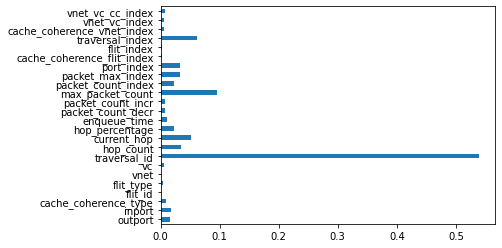

In [118]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

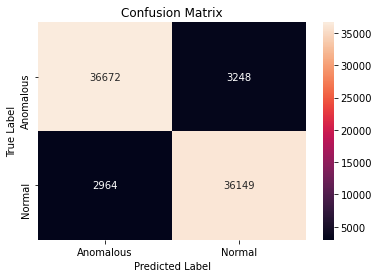

In [119]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [120]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     39920
           1       0.92      0.92      0.92     39113

    accuracy                           0.92     79033
   macro avg       0.92      0.92      0.92     79033
weighted avg       0.92      0.92      0.92     79033



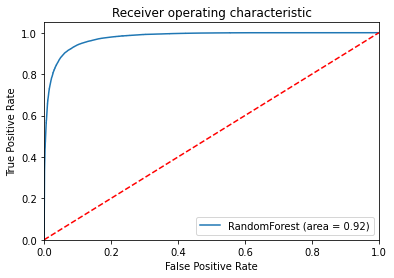

In [121]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [123]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [125]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.02666624489925
Test Prediction Score 93.98352586894082


In [126]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 74.46000000000001
Test Prediction Score 58.92666666666667
Test Prediction Score 57.58
Test Prediction Score 72.34666666666666
Test Prediction Score 57.74666666666667
Test Prediction Score 57.68666666666667
Test Prediction Score 37.78666666666667


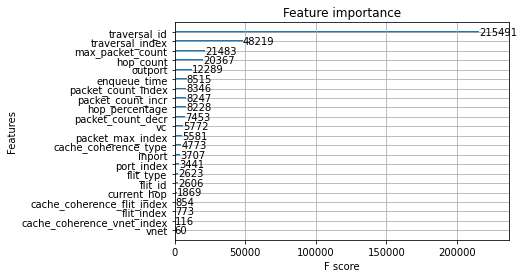

In [127]:
plot_importance(xgbc)
plt.show()

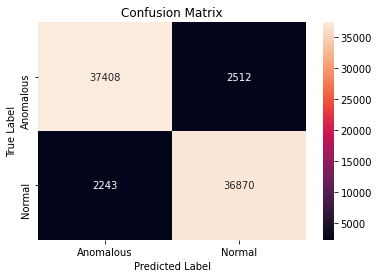

In [128]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [129]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     39920
           1       0.94      0.94      0.94     39113

    accuracy                           0.94     79033
   macro avg       0.94      0.94      0.94     79033
weighted avg       0.94      0.94      0.94     79033



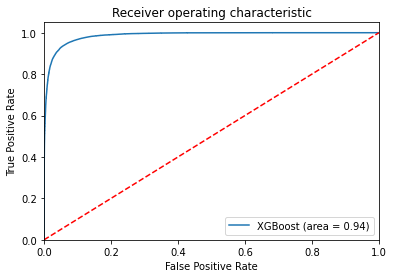

In [130]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [132]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [134]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.77958434821117
Test Prediction Score 85.18593498918173


In [135]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 74.05666666666667
Test Prediction Score 48.52
Test Prediction Score 47.89333333333333
Test Prediction Score 73.37333333333333
Test Prediction Score 59.21333333333333
Test Prediction Score 59.47
Test Prediction Score 36.946666666666665


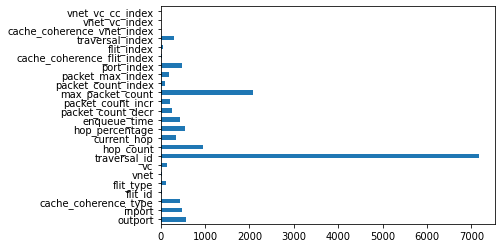

In [136]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

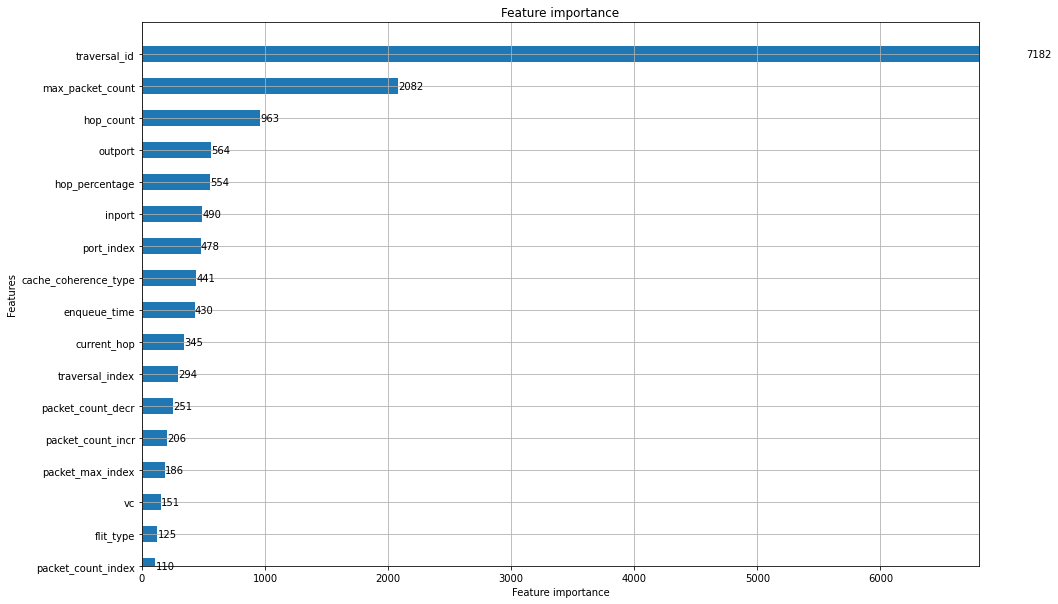

In [137]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [138]:
sorted(gbm.feature_importances_,reverse=True)

[7182,
 2082,
 963,
 564,
 554,
 490,
 478,
 441,
 430,
 345,
 294,
 251,
 206,
 186,
 151,
 125,
 110,
 57,
 27,
 25,
 24,
 14,
 1,
 0]

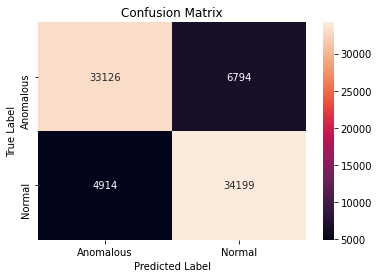

In [139]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     39920
           1       0.83      0.87      0.85     39113

    accuracy                           0.85     79033
   macro avg       0.85      0.85      0.85     79033
weighted avg       0.85      0.85      0.85     79033



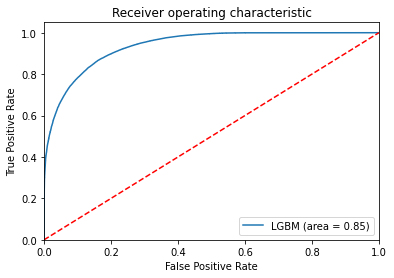

In [141]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()